In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from statistics import mean
import os

In [2]:
rootdir = "Data/multi_lane_platoon/scenario3/"
tables = []
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if file == "data.csv":
            table = pd.read_csv(os.path.join(subdir, file), index_col=0)
            tables.append(table)

In [3]:
group = "Data/multi_lane_platoon/scenario3/1632683300.1234567/groups.csv"
groups = pd.read_csv(group, index_col=0)
split = {}
for idx, row in groups.iterrows():
    c = str(row["captain"])
    i = str(row["id"])
    if c in split.keys():
        split[c].append(i)
    else:
        split[c] = [i]
split

{'270': ['270', '271', '272', '273', '274'],
 '275': ['275', '276', '277', '278', '279']}

In [4]:
tables[0].iloc[:, 0]

0      10
1      10
2      10
3      10
4      10
       ..
176    10
177    10
178    10
179    10
180    10
Name: 270, Length: 181, dtype: int64

In [5]:
def produce_time_graph(t,title):
    plt.figure(figsize=[10,10])
    plt.title(title, fontsize=18)
    plt.xlim([3, len(t)-1])
    plt.xlabel('Time in seconds', fontsize=16)
    plt.ylabel('Speed in Km/h', fontsize=15)
    plt.plot(t)
    plt.legend(list(t.keys()))

In [6]:
def produce_time_graph_box(t):
    c = 3
    d = 4
    fig, axs = plt.subplots(d,c,figsize=(14,14))
    a = 0
    b = 0
    num = 0
    for idx, row in groups.iterrows():
        if a+1 == 4:
            a = 0
            b += 1
        i = str(row["id"])
        axs[b,a].set_title("Vehicle "+i, fontsize=14)

        for x in range(len(tables)):
            axs[b,a].plot(tables[x].iloc[:, num])

        a +=1
        num += 1
    fig.text(0.5, 0.08, 'Time in seconds', ha='center', fontsize=16)
    fig.text(0.08, 0.5, 'Speed in Km/h', va='center', rotation='vertical', fontsize=16)

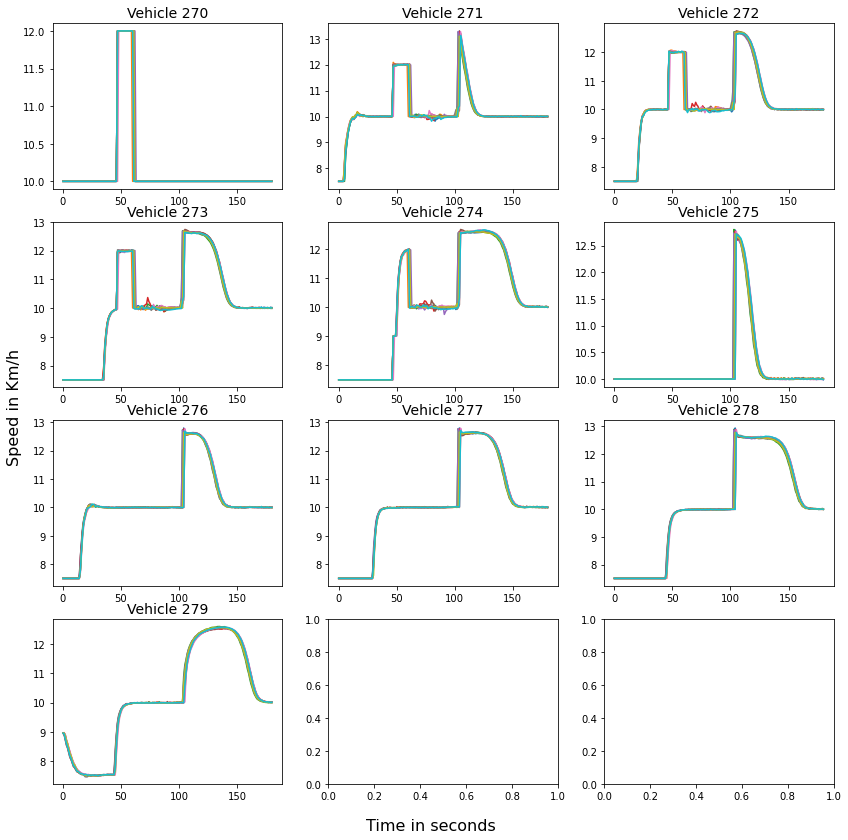

In [7]:
produce_time_graph_box(table)